---

# **Notebook 11 : Visualisation du Nombre de Produits par Pays**

---

### **1. Importation des Bibliothèques**

La première section est dédiée à l'importation des bibliothèques nécessaires pour la manipulation des données et la visualisation.


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

### **2. Chargement et Agrégation des Données**

Dans cette section, nous chargeons les fichiers CSV depuis le répertoire `09_translated_countries`, nous comptons le nombre de produits par pays, et nous créons un DataFrame agrégé.

In [ ]:
# Définir le répertoire contenant les fichiers de pays traduits
input_directory = 'note-books/phase_1_data/09_translated_countries'

# Initialiser un dictionnaire pour stocker le comptage de produits par pays
produits_par_pays = {}

# Parcourir les fichiers CSV dans le répertoire
for file_name in os.listdir(input_directory):
    file_path = os.path.join(input_directory, file_name)
    
    # Lecture avec gestion de l'encodage
    try:
        df = pd.read_csv(file_path, encoding='ISO-8859-1')
    except UnicodeDecodeError:
        print(f"Problème d'encodage pour {file_name}. Réessai avec 'utf-8'.")
        df = pd.read_csv(file_path, encoding='utf-8', errors='replace')

    # Vérifier si la colonne 'countries' est présente
    if 'countries' not in df.columns:
        print(f"Colonne 'countries' non trouvée dans {file_name}.")
        continue

    # Comptage du nombre de produits par pays en filtrant les caractères non latins
    for pays in df['countries']:
        if isinstance(pays, str):
            pays_list = pays.split(', ')  # Si plusieurs pays sont listés dans une cellule, les séparer
            for p in pays_list:
                # Filtrer uniquement les noms avec des caractères latins
                if p and re.match(r'^[a-zA-Z\s]+$', p):
                    produits_par_pays[p] = produits_par_pays.get(p, 0) + 1

# Vérifier si des données ont été ajoutées au dictionnaire
if not produits_par_pays:
    print("Aucun pays trouvé avec caractères latins.")
else:
    # Convertir en DataFrame et trier pour obtenir les 100 premiers
    pays_df = pd.DataFrame(list(produits_par_pays.items()), columns=['Pays', 'Nombre de produits'])
    pays_df = pays_df.sort_values(by='Nombre de produits', ascending=False).head(100)
    print(pays_df.head())  # Afficher les premières lignes pour confirmation


---

### **3. Création du Graphique**

Dans cette section, nous générons un graphique en barres montrant le nombre de produits par pays, avec les pays sur l'axe Y et le nombre de produits sur l'axe X.

/var/folders/l_/z4yzpdw13r1_992xyftwcsmr0000gn/T/ipykernel_97524/3596013819.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Nombre de produits', y='Pays', data=pays_df, palette='viridis')


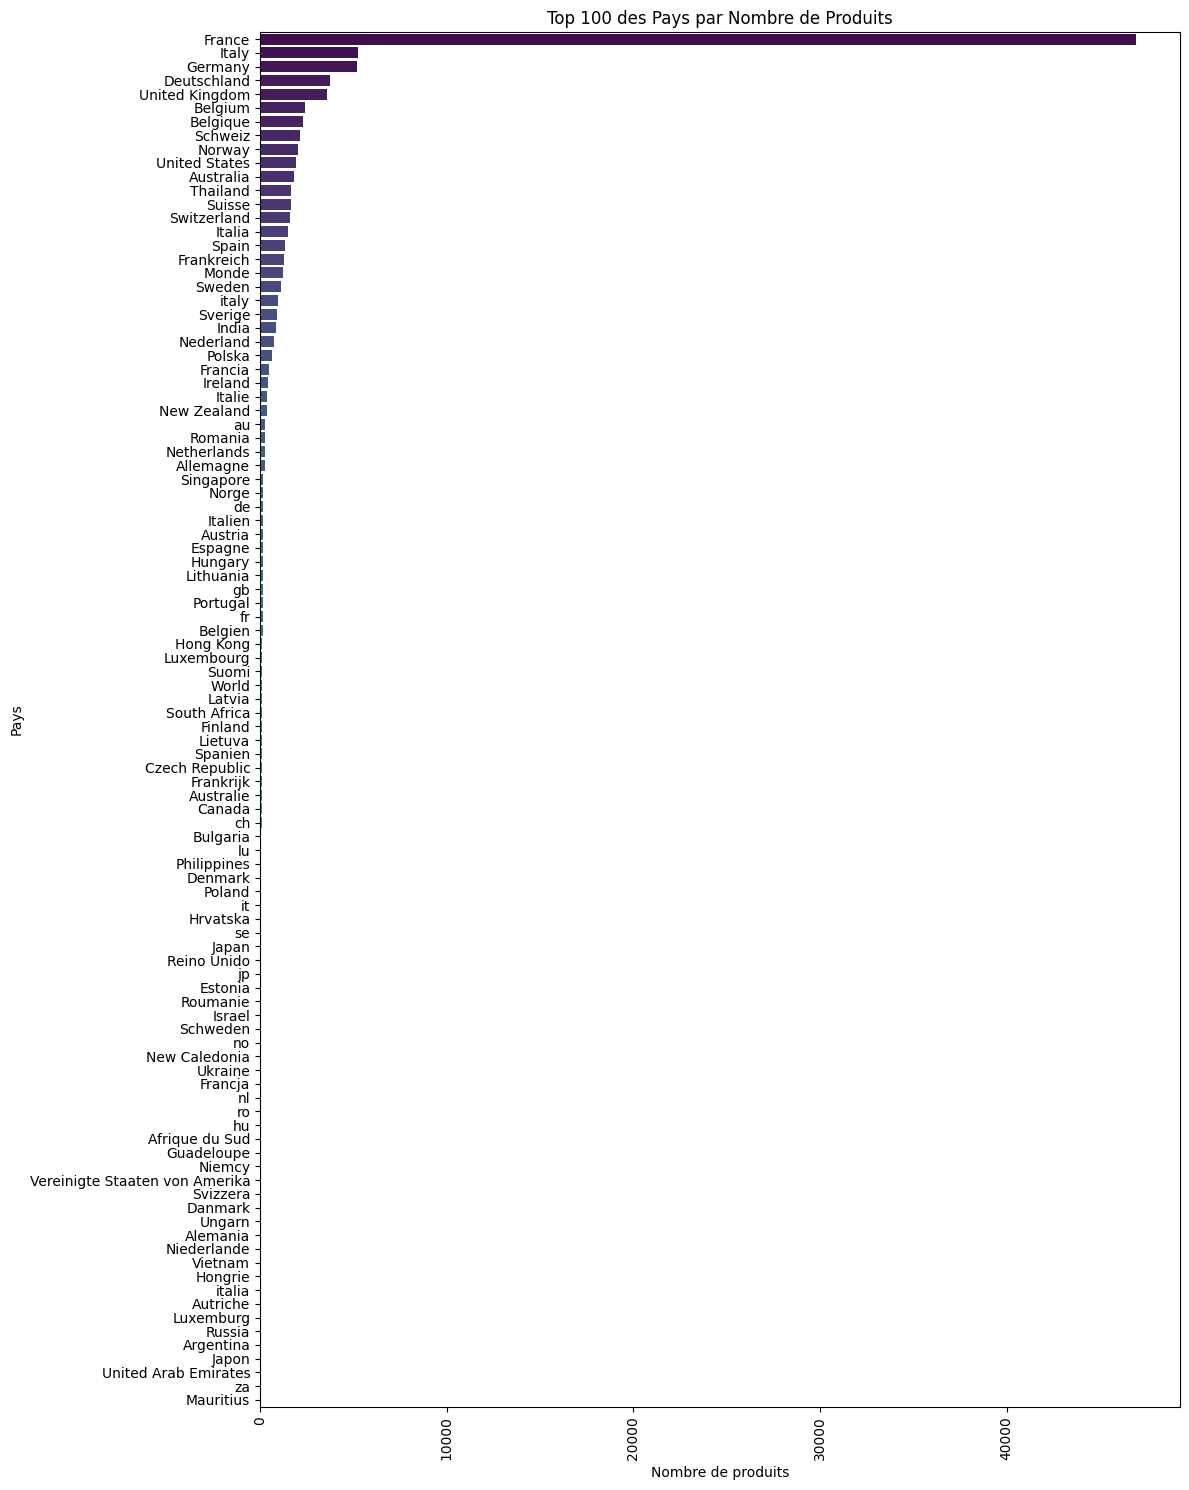

Graphique sauvegardé dans note-books/phase_1_data/graphique/produits_par_pays.png


In [3]:
    # Création du graphique
    plt.figure(figsize=(12, 15))
    sns.barplot(x='Nombre de produits', y='Pays', data=pays_df, palette='viridis')
    plt.title('Top 100 des Pays par Nombre de Produits')
    plt.xlabel('Nombre de produits')
    plt.ylabel('Pays')

    # Ajustement des graduations sur l'axe X
    plt.xticks(rotation=90)

    # Affichage et sauvegarde du graphique
    output_graph_path = 'note-books/phase_1_data/graphique/produits_par_pays.png'
    plt.tight_layout()
    plt.savefig(output_graph_path)
    plt.show()

    print(f"Graphique sauvegardé dans {output_graph_path}")






---

### **Explications**

- **Chargement des données** : Nous avons agrégé les données de tous les fichiers CSV pour obtenir un comptage total par pays.
- **Graphique ordonné** : Les pays sont affichés par ordre croissant en fonction du nombre de produits, facilitant la comparaison visuelle.
- **Sauvegarde du graphique** : Le graphique est enregistré pour une utilisation ultérieure.

---

